In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
myfile =r'data/CombinedPSP.csv'
df_load = pd.read_csv(myfile)
df_load

,PHI,CHI,NN,JSC,ABS_f_D,DISS_wf10_D,STAT_n,STAT_e,STAT_n_D,STAT_n_A,...,CT_f_e_conn,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca
0,0.50,2.2,143,-60.626,0.494161,0.455724,40501,2402,20014,20487,...,0.529559,0.639502,0.907551,1272,1533,2156,0.353934,0.268703,145,176
1,0.50,2.2,200,-60.143,0.499395,0.429118,40501,2227,20226,20275,...,0.333633,0.691437,0.668508,743,1533,1454,0.390204,0.332153,147,174
2,0.50,2.2,250,-57.374,0.497914,0.400567,40501,2053,20166,20335,...,0.531417,0.679163,0.875387,1091,1370,1785,0.457068,0.326105,155,185
3,0.50,2.2,300,-51.381,0.495617,0.379442,40501,1933,20073,20428,...,0.538024,0.684452,0.880948,1040,1301,1684,0.507242,0.351967,157,180
4,0.50,2.2,450,-48.672,0.491198,0.340753,40501,1723,19894,20607,...,0.603018,0.700010,0.930169,1039,1186,1586,0.587606,0.351263,174,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,0.63,4.0,2050,-40.300,0.376040,0.367105,40501,1730,15230,25271,...,0.154913,0.160210,1.000000,268,262,1776,1.000000,0.418978,133,229
1704,0.63,4.0,2150,-38.300,0.375645,0.355383,40501,1632,15214,25287,...,0.166667,0.165966,1.000000,272,266,1670,1.000000,0.425476,133,228
1705,0.63,4.0,2800,-33.400,0.375003,0.337699,40501,1532,15188,25313,...,0.172977,0.163682,1.000000,265,258,1566,1.000000,0.415873,130,225
1706,0.63,4.0,6050,-21.500,0.373620,0.317051,40501,1403,15132,25369,...,0.132573,0.114922,1.000000,186,181,1430,1.000000,0.442233,93,247


<AxesSubplot:>

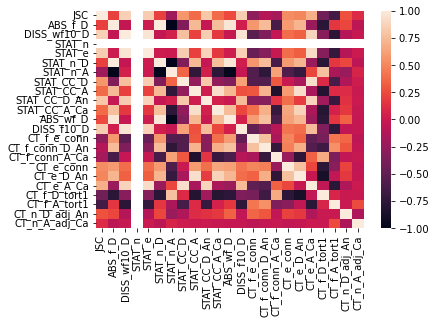

In [6]:
df_load['JSC']=df_load['JSC'].abs()
df_reduce=df_load.iloc[:,3:]
df_reduce = df_reduce.apply(pd.to_numeric, errors='ignore')
corr=df_reduce.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'JSC'),
  Text(0, 1.5, 'd1'),
  Text(0, 2.5, 'd2'),
  Text(0, 3.5, 'd3'),
  Text(0, 4.5, 'd4'),
  Text(0, 5.5, 'd5'),
  Text(0, 6.5, 'd6'),
  Text(0, 7.5, 'd7'),
  Text(0, 8.5, 'd8'),
  Text(0, 9.5, 'd9'),
  Text(0, 10.5, 'd10'),
  Text(0, 11.5, 'd11'),
  Text(0, 12.5, 'd12'),
  Text(0, 13.5, 'd13'),
  Text(0, 14.5, 'd14'),
  Text(0, 15.5, 'd15'),
  Text(0, 16.5, 'd16'),
  Text(0, 17.5, 'd17'),
  Text(0, 18.5, 'd18'),
  Text(0, 19.5, 'd19'),
  Text(0, 20.5, 'd20'),
  Text(0, 21.5, 'd21')])

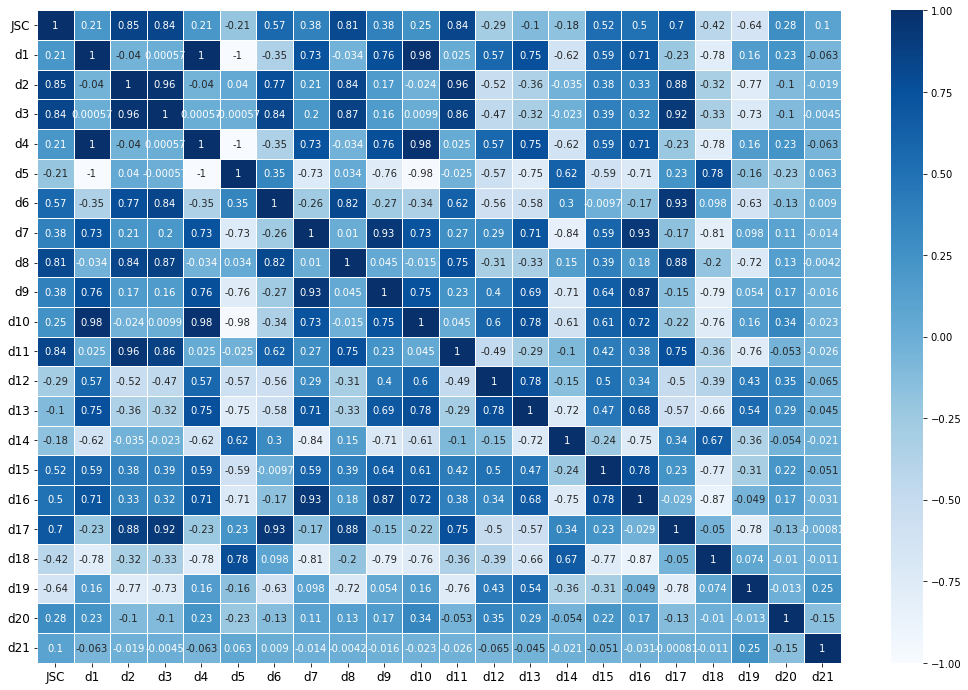

In [8]:
df_refine=df_reduce.iloc[:,np.r_[0:3,4:23]]
df_refine.columns=['JSC', 'd1', 'd2', 'd3', 'd4', 'd5',
       'd6', 'd7', 'd8', 'd9', 'd10',
       'd11', 'd12', 'd13', 'd14',
       'd15', 'd16', 'd17', 'd18', 'd19',
       'd20', 'd21']
df_refine = df_refine.apply(pd.to_numeric, errors='ignore')
corr=df_refine.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap='Blues',annot=True,linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(rotation=0) 

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
# Wrapper method for 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
feature_names=df_refine.iloc[:,1:23].columns
feature_names

Index(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11',
       'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21'],
      dtype='object')

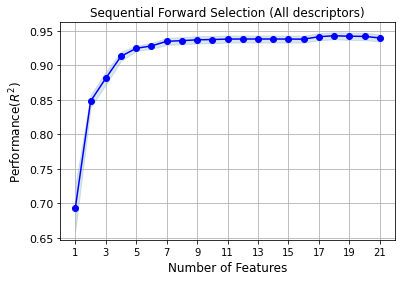

In [12]:
X = df_refine.iloc[:,1:23].values
y=df_refine.iloc[:,0].values
lr = LinearRegression()
sfs = SFS(lr, 
          k_features=21, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=10).fit(X,y,custom_feature_names=feature_names)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (All descriptors)',fontsize=12)
plt.ylabel('Performance($R^2$)',fontsize=12)
plt.xlabel('Number of Features',fontsize=12)

plt.yticks(fontsize=11)
plt.xticks([1, 3, 5,7,9,11,13,15,17,19,21],[1, 3, 5,7,9,11,13,15,17,19,21])


plt.grid()
plt.savefig('Wrapper method r2 all raw.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
X_train_wr,X_test_wr,Y_train_wr,Y_test_wr = train_test_split(df_refine.loc[:,['d2', 'd20', 'd21', 'd4', 'd10']],
                                                 df_refine.loc[:,['JSC']],train_size=0.8,random_state=12 )

linreg_wr=LinearRegression()
linreg_wr.fit(X_train_wr.values,Y_train_wr.values)
y_pred_wr=linreg_wr.predict(X_test_wr.values)
y_train_predict_wr=linreg_wr.predict(X_train_wr.values)

linreg_score_wr=-cross_val_score(linreg_wr,X_train_wr.values,Y_train_wr.values,cv=5,scoring='neg_mean_squared_error')
linreg_r2score_wr=cross_val_score(linreg_wr,X_train_wr.values,Y_train_wr.values,cv=5,scoring='r2')
STD_r2=(linreg_r2score_wr.std())*2
abs_error_wr=-cross_val_score(linreg_wr,X_train_wr.values,Y_train_wr.values,cv=5,scoring='neg_mean_absolute_error')
# logmse_wr=-cross_val_score(linreg_wr,X_train_wr.values,Y_train_wr.values,cv=5,scoring='neg_mean_squared_log_error')

average_mse_wr=np.mean(linreg_score_wr)
average_linreg_r2score_wr=np.mean(linreg_r2score_wr)
average_abserror_wr=np.mean(abs_error_wr)
# average_logmse_wr=np.mean(logmse_wr)

print('Mean Squared error for each cross validation subset:',linreg_score_wr)
print('R\u00b2 for each cross validation subset:',linreg_r2score_wr)
print('Absolute error for each cross validation subset:',abs_error_wr)
# print('Mean Saquared log error for each cross validation subset:',logmse_wr)
print('-'*100)

print('Average Mean Squared error for cross validation:',average_mse_wr)
print('Average R\u00b2 for cross validation:',average_linreg_r2score_wr)
print('Average R\u00b2 for cross validation: {:.2f} (+/- {:.2f})'.format(average_linreg_r2score_wr,STD_r2))
print('Average Absolute error for cross validation:',average_abserror_wr)
# print('Average Mean Squared log error for cross validation:',average_logmse_wr)
print('-'*100)

print('Mean Squared error for prediction:',metrics.mean_squared_error(Y_test_wr, y_pred_wr))
print('R\u00b2 for Prediction:',metrics.r2_score(Y_test_wr, y_pred_wr))
print('Mean Absolute error for Prediction:',metrics.mean_absolute_error(Y_test_wr, y_pred_wr))
# print('Mean Squared log error for Prediction:',metrics.mean_squared_log_error(Y_test_wr, y_pred_wr))

Mean Squared error for each cross validation subset: [66.53258245 72.65633763 70.79801602 63.50041128 72.51594844]
R² for each cross validation subset: [0.9343443  0.91257328 0.93714469 0.94371556 0.93426653]
Absolute error for each cross validation subset: [6.28788355 6.82753769 6.69001248 6.48224254 6.60165534]
----------------------------------------------------------------------------------------------------
Average Mean Squared error for cross validation: 69.20065916665128
Average R² for cross validation: 0.9324088693756789
Average R² for cross validation: 0.93 (+/- 0.02)
Average Absolute error for cross validation: 6.57786631819563
----------------------------------------------------------------------------------------------------
Mean Squared error for prediction: 83.4171205862727
R² for Prediction: 0.9249120366768573
Mean Absolute error for Prediction: 7.041166615985241


In [14]:
abs_error_train_wr=abs(y_train_predict_wr-Y_train_wr)
abs_error_test_wr=abs(y_pred_wr-Y_test_wr)

mean_abs_error_train_wr=average_abserror_wr
normalized_mean_abs_error_train_wr=(mean_abs_error_train_wr)/np.mean(Y_train_wr)

mean_abs_error_test_wr=metrics.mean_absolute_error(Y_test_wr, y_pred_wr)
normalized_mean_abs_error_test_wr=(mean_abs_error_test_wr)/np.mean(Y_test_wr)

print('Normalized mean abs error for training set', (normalized_mean_abs_error_train_wr).to_numpy())
print('Normalized mean abs error for testing set', (normalized_mean_abs_error_test_wr).to_numpy())

Normalized mean abs error for training set [0.08636708]
Normalized mean abs error for testing set [0.09110581]


Features sorted by their score:
[(0.4004, 'd3'), (0.329, 'd11'), (0.1447, 'd20'), (0.0422, 'd21'), (0.0222, 'd2'), (0.021, 'd8'), (0.0076, 'd10'), (0.0068, 'd18'), (0.006, 'd19'), (0.003, 'd15'), (0.0027, 'd16'), (0.0027, 'd1'), (0.0026, 'd9'), (0.0017, 'd5'), (0.0016, 'd17'), (0.0013, 'd12'), (0.0011, 'd4'), (0.0011, 'd13'), (0.001, 'd14'), (0.0008, 'd6'), (0.0004, 'd7')]


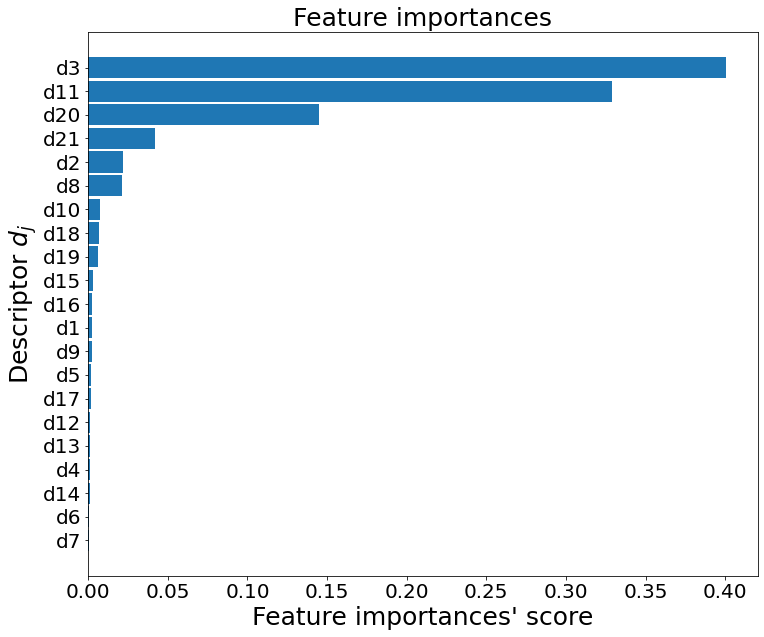

In [16]:
# RANDOM FOREST REGRESSOR
X = df_refine.iloc[:,1:23].values
y=df_refine.iloc[:,0].values

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
feat_names = df_refine.columns[1:]
rf = RandomForestRegressor(random_state=99)
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), 
             reverse=True))
#Features sorted by their score:
[(0.4003, 'd3'), (0.3291, 'd11'), (0.1449, 'd20'), (0.0421, 'd21'), (0.0224, 'd2'), (0.021, 'd8'), (0.0076, 'd10'), (0.0066, 'd18'), (0.006, 'd19'), (0.0031, 'd15'), (0.0027, 'd16'), (0.0026, 'd9'), (0.0021, 'd4'), (0.002, 'd1'), (0.0016, 'd17'), (0.0015, 'd5'), (0.0012, 'd12'), (0.0011, 'd14'), (0.001, 'd13'), (0.0008, 'd6'), (0.0003, 'd7')]
plt.figure(figsize=(12,10))
# plt.figure()
importances=rf.feature_importances_
x_plot = [2*i for i in range(len(importances))]
indices=np.argsort(importances)
plt.title("Feature importances",fontsize=25)
plt.barh(x_plot, importances[indices],height=1.8,color='#1f77b4')

plt.xlabel("Feature importances' score",fontsize=25)
plt.ylabel("Descriptor $d_{j}$",fontsize=25)
plt.yticks(x_plot, feat_names[indices],fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('Random forest all for new descriptor name raw.pdf', dpi=300, bbox_inches='tight')
plt.show()